## Transactions Modeling

### Import Libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Read data and split

In [85]:
df = pd.read_csv("transactions_data.csv")


### Data Analysis on Spending Habits

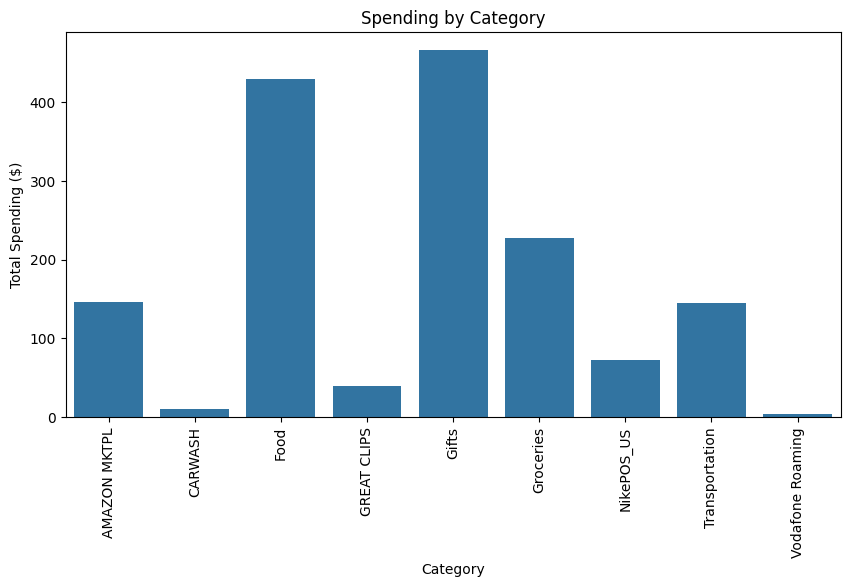

In [86]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df.groupby('Description')['Amount'].sum().index, y=df.groupby('Description')['Amount'].sum().values)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Total Spending ($)')
plt.title('Spending by Category')
plt.show()

C:\Users\dyaba\AppData\Local\Temp\ipykernel_11936\908628543.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendors.index, y=top_vendors.values, palette='Blues_r')


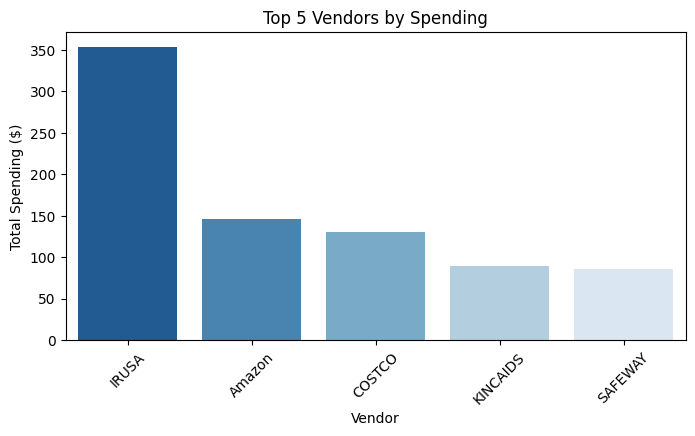

In [88]:
top_vendors = df.groupby('Vendor')['Amount'].sum().nlargest(5)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_vendors.index, y=top_vendors.values, palette='Blues_r')
plt.xlabel('Vendor')
plt.ylabel('Total Spending ($)')
plt.title('Top 5 Vendors by Spending')
plt.xticks(rotation=45)
plt.show()

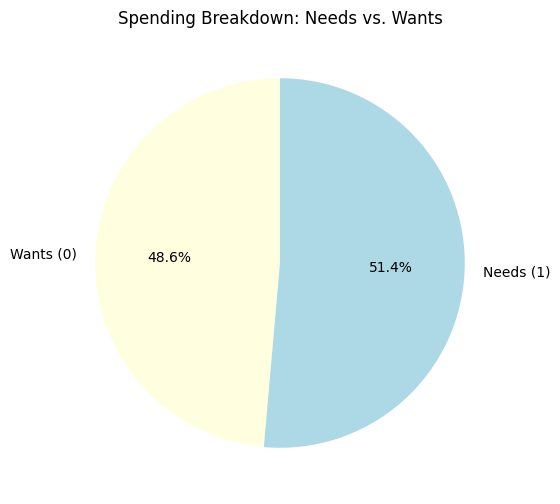

In [83]:
spending_by_need = df.groupby('Need')['Amount'].sum()
plt.figure(figsize=(6, 6))
plt.pie(spending_by_need, labels=['Wants (0)', 'Needs (1)'], autopct='%1.1f%%', colors=['lightyellow', 'lightblue'], startangle=90)
plt.title('Spending Breakdown: Needs vs. Wants')
plt.show()

### Prepare Data for Models

In [89]:
label_enc = LabelEncoder()
df["Vendor"] = label_enc.fit_transform(df["Vendor"])
df["Description"] = label_enc.fit_transform(df["Description"])

X = df[["Vendor", "Amount"]]  # You can add more features
y = df["Need"]

train_data = df[df["Date"] < "10/01/24"]
test_data = df[df["Date"] >= "10/01/24"]

X_train = train_data[["Vendor", "Amount"]]
y_train = train_data["Need"]
X_test = test_data[["Vendor", "Amount"]]
y_test = test_data["Need"]

Since we are estimating a binary value (not continous), we must use a classifier. The parameters need to be label encoded so we can use them in the random forest classifier.

### Try Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
# Train Random Forest Model
# clf = RandomForestClassifier(max_depth = 10, class_weight="balanced", random_state=42)
best_score = 0
def randomForest(sweep):

    clf = RandomForestClassifier(max_depth=sweep, random_state=42)
    clf.fit(X_train, y_train)

    # Predict Needs for Month 3
    y_test_pred = clf.predict(X_test)

    score = accuracy_score(y_test, y_test_pred)
    if score > best_score:
        return score
    else:
        return best_score

sweep = np.arange(1, 101)
for param in sweep:
    score = randomForest(param)
    
print("Test Accuracy:", score)
# print("Test Report:\n", classification_report(y_test, y_test_pred))


Test Accuracy: 0.7


### Try Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict
y_pred = nb.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Report:", report)

Accuracy: 0.65
Report:               precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.67      0.73      0.70        11

    accuracy                           0.65        20
   macro avg       0.65      0.64      0.64        20
weighted avg       0.65      0.65      0.65        20



### Try Neural Network (MLP Classifier)

In [91]:
from sklearn.neural_network import MLPClassifier

# define
mdlDgtNnc = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=700, random_state=42, verbose= False)

# fit
mdlDgtNnc.fit(X_train, y_train)

# predict
y_test_pred = mdlDgtNnc.predict(X_test)

# evaluate
print("Neural Network Classifier:")
print(classification_report(y_test, y_test_pred))

Neural Network Classifier:
              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.67      0.73      0.70        11

    accuracy                           0.65        20
   macro avg       0.65      0.64      0.64        20
weighted avg       0.65      0.65      0.65        20



c:\Users\dyaba\Desktop\School\Spring 2025\Data Science\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


Based on this, Random Forest Classifier should be used since we score better than using an MLP Classifier (80% vs 65%)